#       The Sparks Foundation  -  Graduate Rotational Internship Program

<b> <h3>Name : Soorya E T </h3></b>



##                                    Task 2 : Prediction using Unsupervised ML

### Objective : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

<h3>Here we use Unsupervised KMeans Clustering algorithm.

<h3> KMeans Algorithm :
    
    The main objective of the K-Means algorithm is to minimize the sum of distances 
    between the points and their respective cluster centroid.

<h2> Importing Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2> Reading Data </h2>

In [2]:
data = pd.read_csv("/home/surya/TSF INTERNSHIP/GRIP Task2- Clustering/Iris.csv")

print("Data imported successfully")
data.head()

Data imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = data.drop(["Id","Species"],axis=1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
X.shape

(150, 4)

In [5]:
X.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [6]:
X.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<h2>Exploratory Data Analysis</h2>

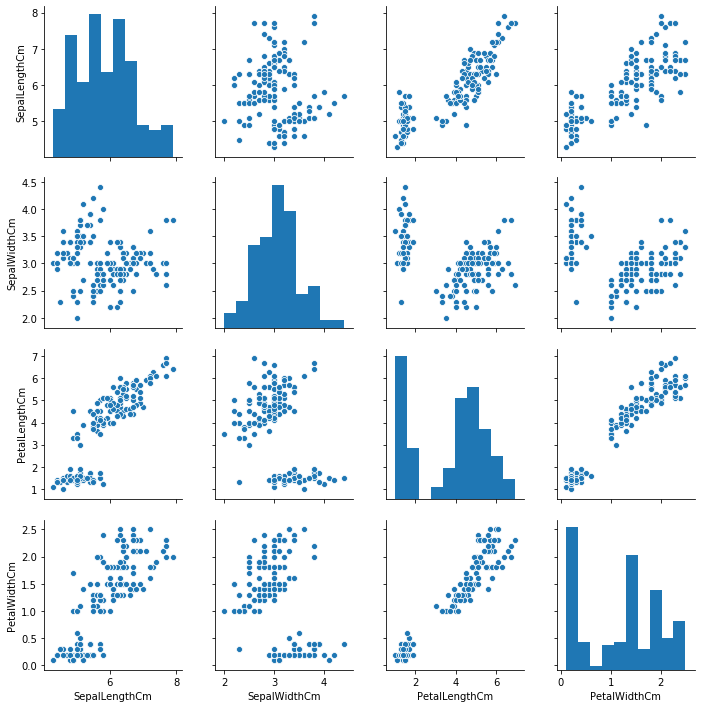

In [7]:
sns.pairplot(X)
plt.show()

<h3>Correlation

In [8]:
corr_mat = X.corr()        
corr_mat


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


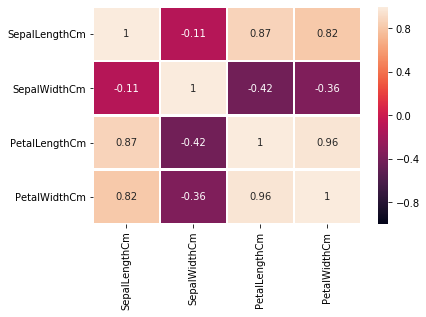

In [9]:
sns.heatmap(corr_mat,vmax=1,vmin=-1,annot=True,linewidth=1.5)


<h2> Checking for null values </h2>

In [10]:
X.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

<h2> Finding the optimum number of clusters for k-means classification</h2>

note : default value of n_clusters is 8

<h3>Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data.

<h3>Properties of clusters :<p>

Property 1 : All the data points in a cluster should be similar to each other.

Property 2 : The data points from different clusters should be as different as possible

In [11]:
X = X.iloc[:, [0, 1, 2, 3]].values


In [12]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia is the sum of difference between centroid & corresponding data point
    print("k : ",i,"wcss : ",kmeans.inertia_)

k :  1 wcss :  680.8244
k :  2 wcss :  152.36870647733906
k :  3 wcss :  78.94084142614602
k :  4 wcss :  57.345409315718165
k :  5 wcss :  46.53558205128205
k :  6 wcss :  38.93873974358974
k :  7 wcss :  34.19068792479662
k :  8 wcss :  29.905374299825105
k :  9 wcss :  27.927882157034972
k :  10 wcss :  25.95549708624709


<h3>Evaluation Metrics used here for clustering  -  Inertia<p>

 Inertia actually calculates the sum of distances of all the points within a cluster from the centroid of that cluster.<p>
    
This distance within the clusters is known as intracluster distance.<p>
    
So, inertia gives us the sum of intracluster distances.<p>

Note : The lesser the inertia value, the better our clusters are. 


<h3> Plotting the results onto a line graph , allowing us to observe "The elbow"</h3>

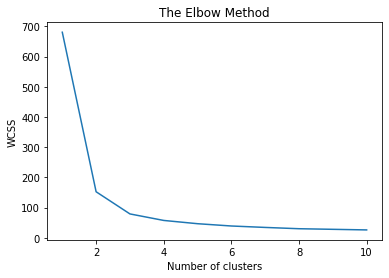

In [13]:
plt.plot(range(1,11),wcss)

plt.title("The Elbow Method")

plt.xlabel("Number of clusters")

plt.ylabel("WCSS") # Within cluster sum of square

plt.show()

<h3>You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. <p>
    
This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.<p>

From this we choose the number of clusters as = 3
</h3>

<h3> Applying kmeans to the dataset or Creating the kmeans classifier</h3>

In [14]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state =0)

y_kmeans = kmeans.fit_predict(X)

In [15]:
y_kmeans            # this kmeans is the final model

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

<h3> Visualising the clusters - On the first two columns </h3>

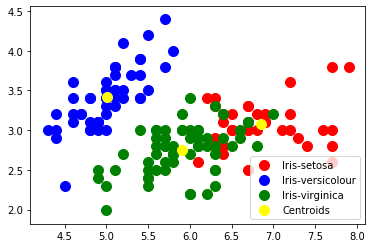

In [16]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1], s = 100, c = "red", label= "Iris-setosa")

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1], s = 100, c = "blue", label = "Iris-versicolour")

plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1], s = 100 , c = "green", label = "Iris-virginica")

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

plt.show()

<h3>Thank you</h3>